# Binary classfication probelm with tumor data
- Example tumor sizes for non-malignant
- Example tumor sizes for malignant

### Visualize tumor data

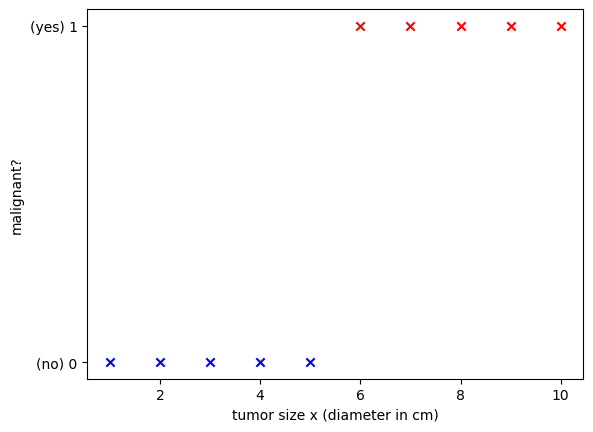

In [17]:
import matplotlib.pyplot as plt

# Data points
x_non_malignant = [1, 2, 3, 4, 5]  # Example tumor sizes for non-malignant
y_non_malignant = [0] * 5
x_malignant = [6, 7, 8, 9, 10]  # Example tumor sizes for malignant
y_malignant = [1] * 5

# Plotting
plt.scatter(x_non_malignant, y_non_malignant, marker='x', color='blue', label='Non-malignant')
plt.scatter(x_malignant, y_malignant, marker='x', color='red', label='Malignant')

# Labels and title
plt.xlabel('tumor size x (diameter in cm)')
plt.ylabel('malignant?')
plt.yticks([0, 1], ['(no) 0', '(yes) 1'])
plt.grid(False)

# Show plot
plt.show()

# Visualize Sigmoid function

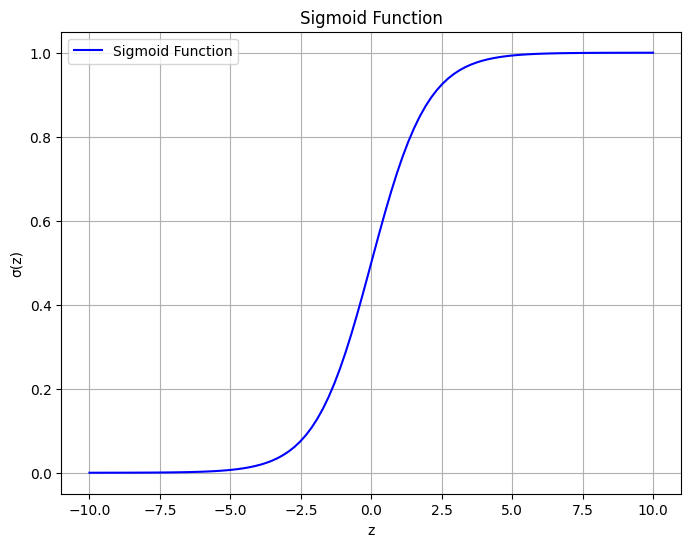

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Range of z values
z_values = np.linspace(-10, 10, 100)

# Compute sigmoid values
sigmoid_values = sigmoid(z_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, 'b-', label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.legend()

# Save the plot
plt.savefig('sigmoid_function.png')

### Adjust w and b to classify tumor's type (malignant vs. non-malignant)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to plot the neuron and sigmoid curve
def plot_neuron(w=20.0, b=-7.0):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 2]})

    # Subplot 1: Neuron diagram
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(-0.5, 0.5)
    ax1.axis('off')

    # Draw circles (input and summation nodes)
    circle1 = plt.Circle((0, 0), 0.3, fill=False)
    circle2 = plt.Circle((2, 0), 0.3, fill=False)
    ax1.add_patch(circle1)
    ax1.add_patch(circle2)

    # Draw arrow connecting circles
    ax1.arrow(0.3, 0, 1.4, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')

    # Labels
    ax1.text(0, 0, 'x', ha='center', va='center', fontsize=12)
    ax1.text(2, 0, 'Σ', ha='center', va='center', fontsize=12)
    ax1.text(1, 0.2, f'w = {w}', ha='center', va='center', fontsize=12)
    ax1.text(1, -0.4, f'b = {b}', ha='center', va='center', fontsize=12)

    # Subplot 2: Sigmoid plot
    x = np.linspace(-1, 1, 100)  # Input range from -1 to 1
    z = w * x + b
    y = sigmoid(z)

    ax2.plot(x, y, 'r-', label='Sigmoid Output')
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Create interactive sliders for w and b
interact(plot_neuron,
         w=widgets.FloatSlider(min=-50, max=200, step=0.1, value=20.0, description='w'),
         b=widgets.FloatSlider(min=-50, max=200, step=0.1, value=-7.0, description='b'))

interactive(children=(FloatSlider(value=20.0, description='w', max=200.0, min=-50.0), FloatSlider(value=-7.0, …

<function __main__.plot_neuron(w=20.0, b=-7.0)>

# Tumor Data and sigmoid plotting

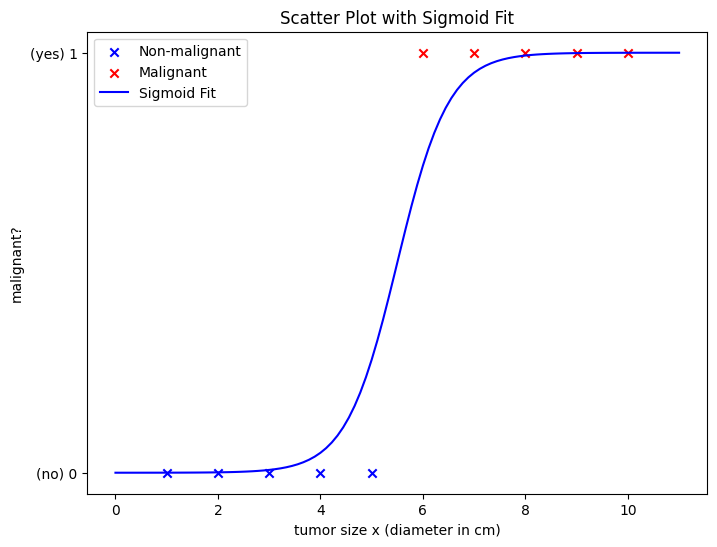

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Data points (approximated from the scatter plot)
x_non_malignant = [1, 2, 3, 4, 5]
y_non_malignant = [0] * 5
x_malignant = [6, 7, 8, 9, 10]
y_malignant = [1] * 5

# Combine data for plotting
x_data = x_non_malignant + x_malignant
y_data = y_non_malignant + y_malignant

# Sigmoid curve
x_range = np.linspace(0, 11, 100)
w = 2  # Weight
b = -11  # Bias
z = w * x_range + b
sigmoid_values = sigmoid(z)

# Plotting
plt.figure(figsize=(8, 6))
# Scatter plot
plt.scatter(x_non_malignant, y_non_malignant, marker='x', color='blue', label='Non-malignant')
plt.scatter(x_malignant, y_malignant, marker='x', color='red', label='Malignant')
# Sigmoid curve
plt.plot(x_range, sigmoid_values, 'b-', label='Sigmoid Fit')

# Labels and title
plt.xlabel('tumor size x (diameter in cm)')
plt.ylabel('malignant?')
plt.yticks([0, 1], ['(no) 0', '(yes) 1'])
plt.title('Scatter Plot with Sigmoid Fit')
plt.grid(False)
plt.legend()

# Save the plot
plt.savefig('scatter_with_sigmoid.png')

# tumor preditioin with Pytorch

In [20]:
import torch
import torch.nn as nn

# Data
x_non_malignant = [1, 2, 3, 4, 5]
y_non_malignant = [0] * 5
x_malignant = [6, 7, 8, 9, 10]
y_malignant = [1] * 5

# Combine data
X = x_non_malignant + x_malignant
Y = y_non_malignant + y_malignant

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32).reshape(-1, 1)  # Shape: (10, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)  # Shape: (10, 1)

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input (tumor size), one output (logit)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid to get probability

# Initialize model, loss, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
    predicted_labels = (predictions >= 0.5).float()  # Threshold at 0.5

# Print results
print("\nTumor Sizes:", X)
print("True Labels:", Y)
print("Predicted Probabilities:", predictions.flatten().tolist())
print("Predicted Labels:", predicted_labels.flatten().tolist())



Epoch [100/1000], Loss: 0.4540
Epoch [200/1000], Loss: 0.4371
Epoch [300/1000], Loss: 0.4216
Epoch [400/1000], Loss: 0.4074
Epoch [500/1000], Loss: 0.3943
Epoch [600/1000], Loss: 0.3822
Epoch [700/1000], Loss: 0.3710
Epoch [800/1000], Loss: 0.3607
Epoch [900/1000], Loss: 0.3510
Epoch [1000/1000], Loss: 0.3421

Tumor Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
True Labels: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Predicted Probabilities: [0.18069209158420563, 0.2570095658302307, 0.35172295570373535, 0.4597426652908325, 0.5716820359230042, 0.6767361760139465, 0.7665457725524902, 0.8373993635177612, 0.8898391723632812, 0.9268442988395691]
Predicted Labels: [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [21]:
# Test unseen input
unseen_input = torch.tensor([[5.5]], dtype=torch.float32)  # Unseen tumor size
model.eval()
with torch.no_grad():
    prediction = model(unseen_input)
    predicted_label = (prediction >= 0.5).float()

# Print results
print(f"\nUnseen Tumor Size: {unseen_input.item()}")
print(f"Predicted Probability of Malignancy: {prediction.item():.4f}")
print(f"Predicted Label: {predicted_label.item()} ({'Malignant' if predicted_label.item() == 1 else 'Non-malignant'})")

# Print model parameters for insight
weight = model.linear.weight.item()
bias = model.linear.bias.item()
print(f"\nModel Parameters: w = {weight:.4f}, b = {bias:.4f}")


Unseen Tumor Size: 5.5
Predicted Probability of Malignancy: 0.6257
Predicted Label: 1.0 (Malignant)

Model Parameters: w = 0.4501, b = -1.9618
